# SHARK ATTACKS 🦈

In [252]:
# importing libraries
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib as plt

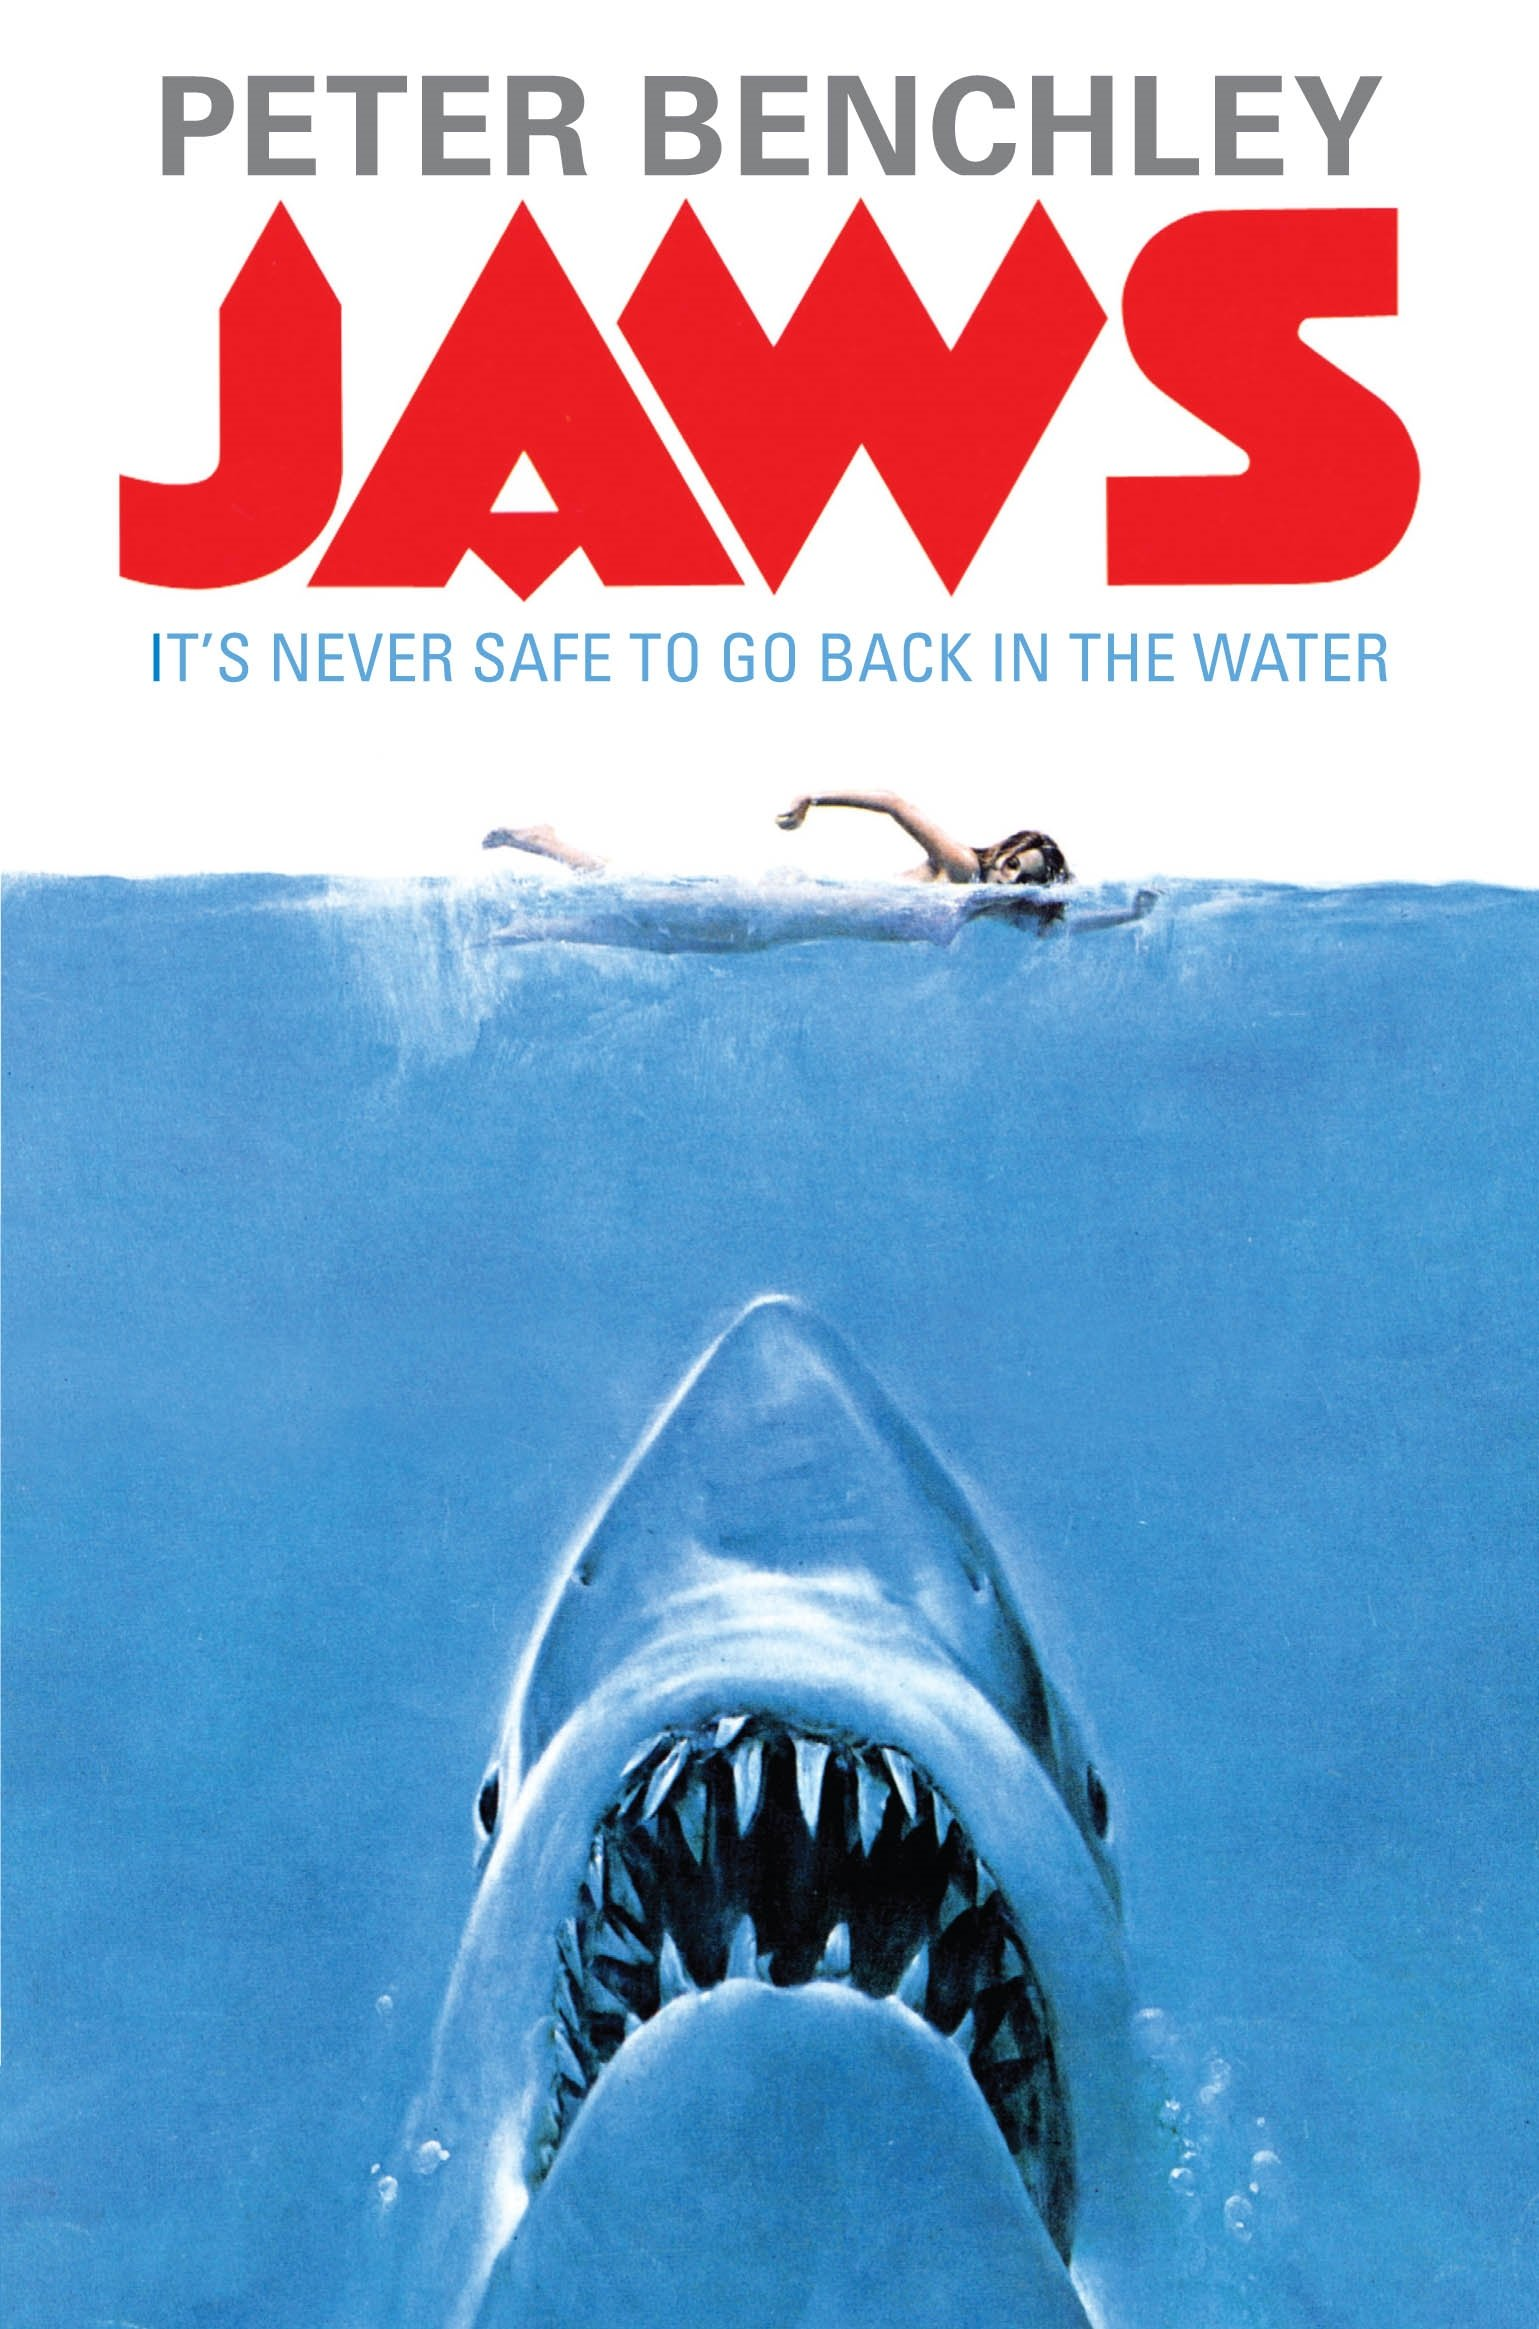

In [253]:
from IPython import display
display.Image("/Users/narea/Desktop/ironhack/Project-1/images/jaws.jpg", width="500")

## Exploratory Data Analysis and data cleaning

In [254]:
df = pd.read_csv("/Users/narea/Desktop/ironhack/Project-1/data/attacks.csv", encoding = 'unicode_escape')

In [255]:
df

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [256]:
df.shape

(25723, 24)

In [257]:
df.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

In [258]:
print(attacks.dtypes)
print(attacks.iloc[0])

Case Number                object
Date                       object
Year                      float64
Type                       object
Country                    object
Area                       object
Location                   object
Activity                   object
Name                       object
Sex                        object
Age                        object
Injury                     object
Fatal (Y/N)                object
Time                       object
Species                    object
Investigator or Source     object
pdf                        object
href formula               object
href                       object
Case Number.1              object
Case Number.2              object
original order            float64
Unnamed: 22                object
Unnamed: 23                object
dtype: object
Case Number                                                      2018.06.25
Date                                                            25-Jun-2018
Year              

In [259]:
### As we can see in the next table, we  

In [260]:
attacks_nan = df.isna().sum()
percent_missing = attacks_nan * 100 / len(attacks)
missing_values_attack = pd.DataFrame({'Missing values': attacks_nan, 'Missing %': percent_missing})
missing_values_attack

,Missing values,Missing %
Case Number,17021,66.170353
Date,19421,75.500525
Year,19423,75.508300
Type,19425,75.516075
Country,19471,75.694903
Area,19876,77.269370
Location,19961,77.599813
Activity,19965,77.615364
Name,19631,76.316915
Sex,19986,77.697003


In [261]:
missing_values_attack.mean()

Missing values    20344.833333
Missing %            79.091993
dtype: float64

In [262]:
df.dropna(subset = ['Location'], inplace = True)

In [263]:
df

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6296,ND.0006,Before 1906,0.0,Unprovoked,AUSTRALIA,New South Wales,,Swimming,Arab boy,M,...,Said to involve a grey nurse shark that leapt ...,"L. Becke in New York Sun, 9/9/1906; L. Schultz...",ND-0006-ArabBoy-Prymount.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0006,ND.0006,7.0,NaN,NaN
6297,ND.0005,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,...,NaN,"H. Taunton; N. Bartlett, p. 234",ND-0005-RoebuckBay.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0005,ND.0005,6.0,NaN,NaN
6299,ND.0003,1900-1905,0.0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,...,NaN,"F. Schwartz, p.23; C. Creswell, GSAF",ND-0003-Ocracoke_1900-1905.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0003,ND.0003,4.0,NaN,NaN
6300,ND.0002,1883-1889,0.0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,M,...,NaN,"The Sun, 10/20/1938",ND-0002-JulesPatterson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0002,ND.0002,3.0,NaN,NaN


In [264]:
df.shape

(5762, 24)

In [265]:
attacks_nan = df.isna().sum()
percent_missing = attacks_nan * 100 / len(df)

In [266]:
missing_values_attack = pd.DataFrame({'Missing values': attacks_nan, 'Missing %': percent_missing})
missing_values_attack

,Missing values,Missing %
Case Number,1,0.017355
Date,0,0.000000
Year,1,0.017355
Type,3,0.052065
Country,11,0.190906
Area,215,3.731343
Location,0,0.000000
Activity,457,7.931274
Name,168,2.915654
Sex,498,8.642832


In [267]:
df.drop(["Unnamed: 22", "Unnamed: 23", "href", "Case Number.1", "Case Number.2", "pdf", "Case Number", "href formula", "Investigator or Source","original order","Name"], axis=1, inplace=True)

In [268]:
df.columns

Index(['Date', 'Year', 'Type', 'Country', 'Area', 'Location', 'Activity',
       'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time', 'Species '],
      dtype='object')

In [269]:
df.shape

(5762, 13)

In [270]:
df["Fatal (Y/N)"]

0       N
1       N
2       N
3       N
4       N
       ..
6296    Y
6297    Y
6299    Y
6300    Y
6301    Y
Name: Fatal (Y/N), Length: 5762, dtype: object

In [271]:
df["Country"]

0                      USA
1                      USA
2                      USA
3                AUSTRALIA
4                   MEXICO
               ...        
6296             AUSTRALIA
6297             AUSTRALIA
6299                   USA
6300                PANAMA
6301    CEYLON (SRI LANKA)
Name: Country, Length: 5762, dtype: object

In [272]:
df.duplicated().sum()

5

In [273]:
df["Date"].value_counts()

1957           11
1956            8
1941            7
1949            6
1950            6
               ..
25-Jun-1996     1
04-Jul-1996     1
10-Jul-1996     1
14-Jul-1996     1
1845-1853       1
Name: Date, Length: 5009, dtype: int64

In [274]:
df['Month'] = df['Date'].str.extract('(-\D{3}-)', expand=True)

In [275]:
df['Month']

0       -Jun-
1       -Jun-
2       -Jun-
3       -Jun-
4       -Jun-
        ...  
6296      NaN
6297      NaN
6299      NaN
6300      NaN
6301      NaN
Name: Month, Length: 5762, dtype: object

In [276]:
regex_list = [r"(-\D{3}-): ", r"-"]
df['Month'] = df['Month'].replace(regex=regex_list, value="")

NameError: name 'savefig' is not defined

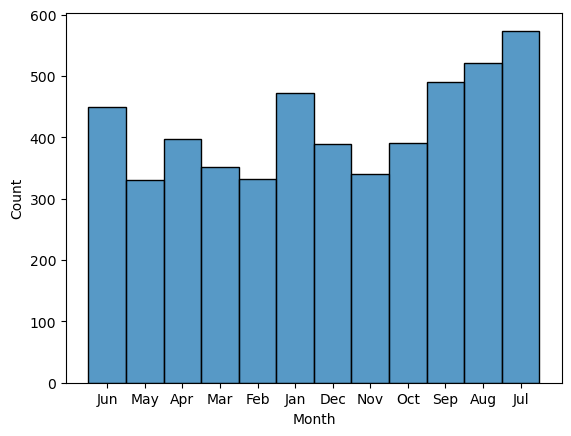

In [277]:
df.dropna(subset= ['Month'], inplace = True)
sns.histplot(data=df, x="Month")
savefig('/Users/narea/Desktop/ironhack/Project-1/images')

In [280]:
df["Age"].value_count2s()

17          148
18          138
19          134
16          127
20          126
           ... 
mid-20s       1
74            1
45            1
21 or 26      1
2½            1
Name: Age, Length: 143, dtype: int64

In [281]:
df["Country"].value_counts()

USA                    2013
AUSTRALIA              1199
SOUTH AFRICA            517
NEW ZEALAND             108
BRAZIL                  102
                       ... 
ADMIRALTY ISLANDS         1
BRITISH WEST INDIES       1
NORTH SEA                 1
GABON                     1
TASMAN SEA                1
Name: Country, Length: 151, dtype: int64

In [282]:
df["Activity"].value_counts()

Surfing                                928
Swimming                               748
Fishing                                348
Spearfishing                           251
Bathing                                138
                                      ... 
Sinking of the ferryboat Don Juan        1
Sinking of the ferryboat Bongbong 1      1
Hookah Diving                            1
Freedom swimming                         1
Crossing river on a raft                 1
Name: Activity, Length: 1149, dtype: int64

In [283]:
df["Area"].value_counts()

Florida                         956
New South Wales                 447
Queensland                      291
California                      279
Hawaii                          260
                               ... 
Saint-Paul                        1
12 miles off the north coast      1
Missouri                          1
South Sinai, Gulf of Aqaba        1
Island of Volos                   1
Name: Area, Length: 586, dtype: int64

In [286]:
df["Fatal (Y/N)"].value_counts()

N          3599
Y           979
UNKNOWN      36
 N            5
M             1
2017          1
Name: Fatal (Y/N), dtype: int64

In [287]:
df["Month"].value_counts()

Jul    574
Aug    521
Sep    491
Jan    473
Jun    449
Apr    398
Oct    391
Dec    390
Mar    352
Nov    340
Feb    332
May    330
Name: Month, dtype: int64

In [290]:
df["Year"].value_counts()

2015.0    137
2011.0    125
2017.0    125
2016.0    123
2009.0    113
         ... 
1831.0      1
1859.0      1
1834.0      1
1857.0      1
1869.0      1
Name: Year, Length: 206, dtype: int64

In [292]:
df["Sex"].value_counts()

KeyError: 'Sex'